# General Setup

In [28]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, quantities
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

category =  "config2"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [29]:
############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

## Plot prms

# Run

In [30]:
run = 46
theta = 45
qois = ['comp(u,0)', 'comp(u,2)']

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [31]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")

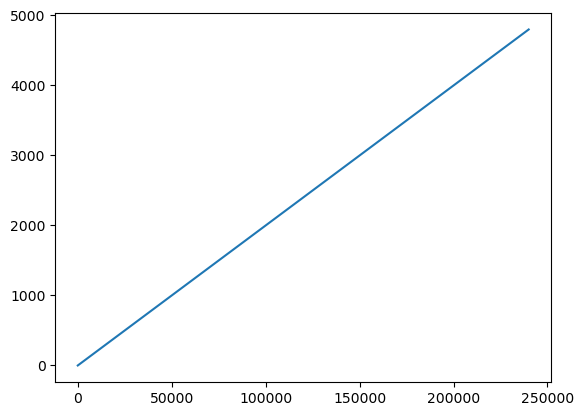

In [32]:
start = 40000
stop = 120000
by = 1

plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)

## Plot ABL

In [33]:
qty_dict = probes.create_qty_dict(
    theta_wind = theta,
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    stack = range(1,40),
)

for k, v in qty_dict.items(): v.calc_stats()

processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 3 seconds
pressure data not founnd, replacing with zeros
processing data took 2 seconds
pressure data not founnd, replacing with zeros


col_0-0: u* = 0.17596634418631124, z0 = 0.12244341380133032, disp = 0.6981010027462387
col_0-0_Bx: u* = 0.3629372419509732, z0 = 0.6960642311027021, disp = 0.0
col_0-0_Bxz: u* = 0.21125971777492428, z0 = 0.2172026817172321, disp = 0.28747901389196284
col_0-0_Bz: u* = 0.3339612029518312, z0 = 0.7152003491645481, disp = 0.0
col_0-n1: u* = 0.2065545101729951, z0 = 0.5483589819621311, disp = 0.0
col_0-n1_Bx: u* = 0.32436887868628544, z0 = 0.44198663389356857, disp = 0.0
col_0-n1_Bxz: u* = 0.24418850737533812, z0 = 0.2549563119216183, disp = 0.3573370673151525
col_0-n1_Bz: u* = 0.2651105091200041, z0 = 0.7339971876448936, disp = 0.0
col_0-n2: u* = 0.2250611854090258, z0 = 0.6969829146722099, disp = 0.0
col_0-n2_Bx: u* = 0.32706964289361995, z0 = 0.5235490319814288, disp = 0.0
col_0-n2_Bxz: u* = 0.3410065135059984, z0 = 0.6054896775255811, disp = 0.0
col_0-n2_Bz: u* = 0.31865999394522865, z0 = 1.9787836159009764, disp = 0.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='mean velocity [m/s]', ylabel='height [m]'>)

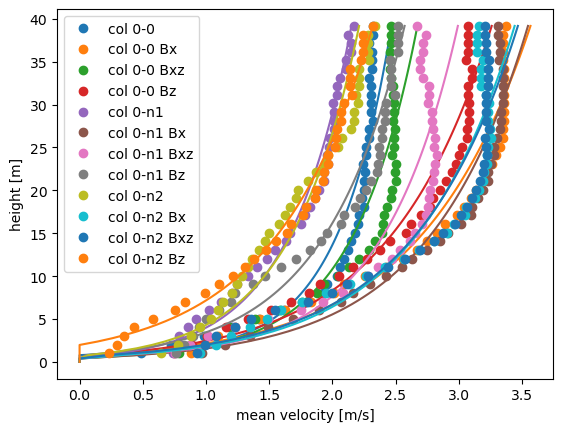

In [36]:
quantities.plot_ABL(qty_dict, fit_disp=True)


averaged: u* = 0.28043505759101045, z0 = 0.5717282351552007, disp = 0.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='mean velocity [m/s]', ylabel='height [m]'>)

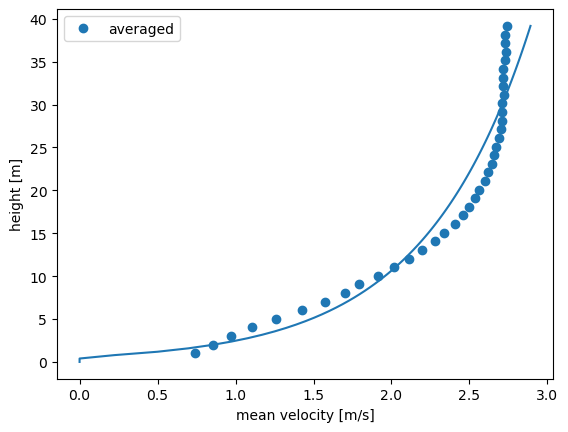

In [35]:
qty_total = quantities.Qty()
for i, (k, v) in enumerate(qty_dict.items()):
    if i == 0:
        qty_total.meanU = np.zeros_like(v.meanU)
        qty_total.y = v.y
    qty_total.meanU += v.meanU
qty_total.meanU /= len(qty_dict)

quantities.plot_ABL({"averaged": qty_total}, fit_disp=True)

## Plot Length Scales

KeyboardInterrupt: 

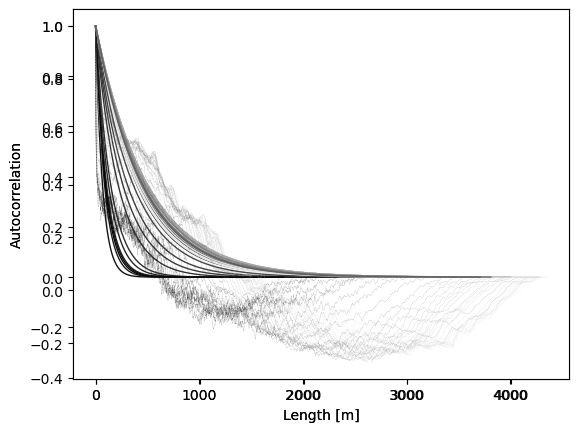

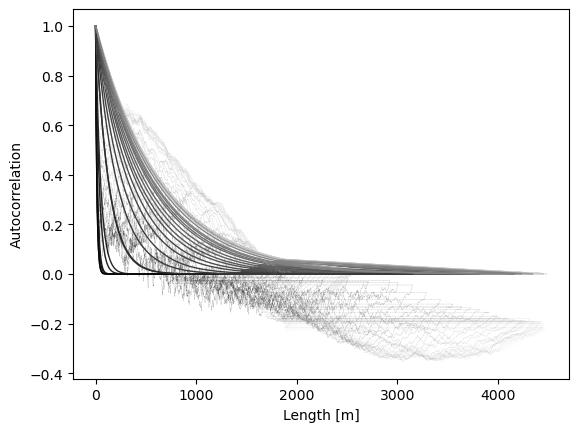

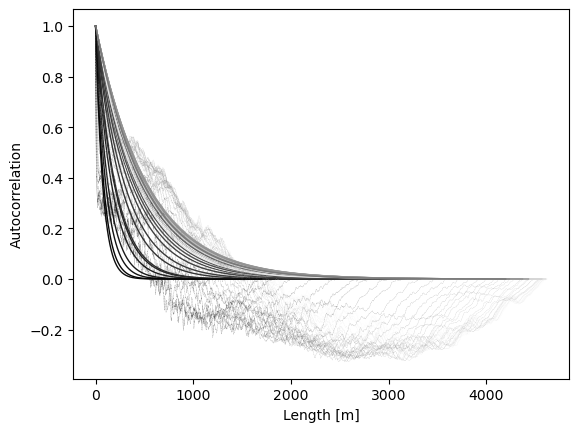

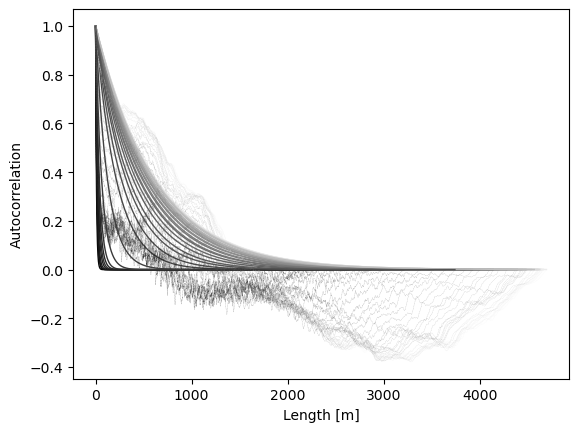

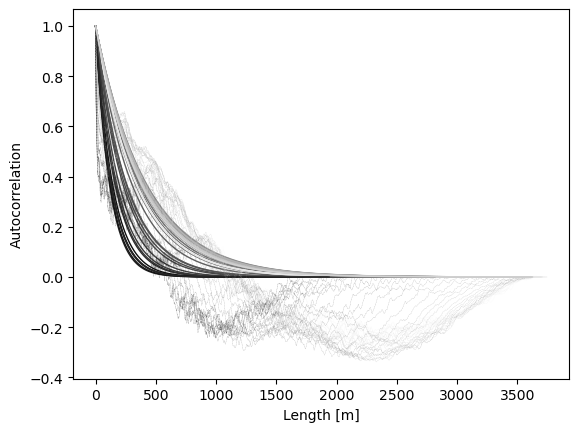

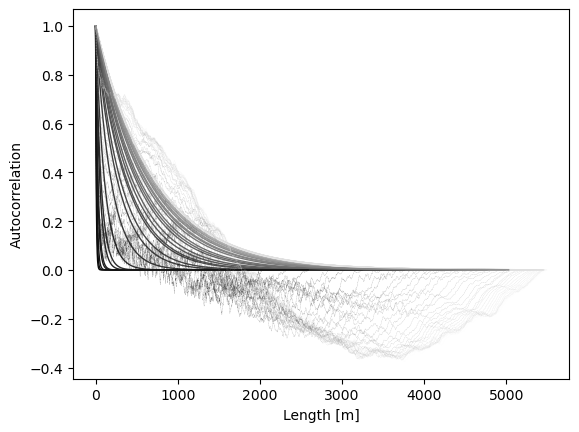

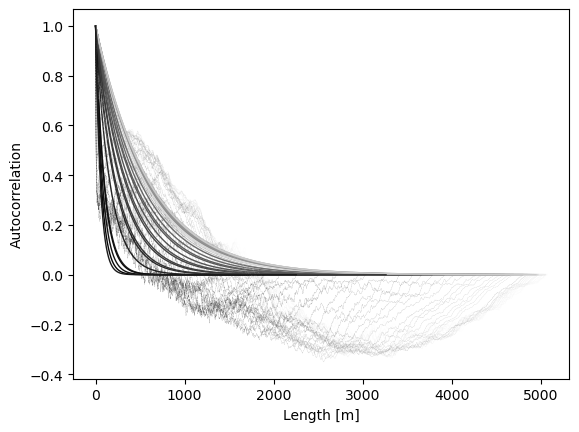

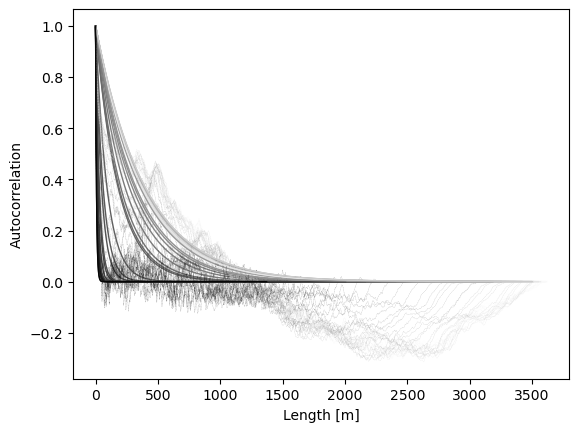

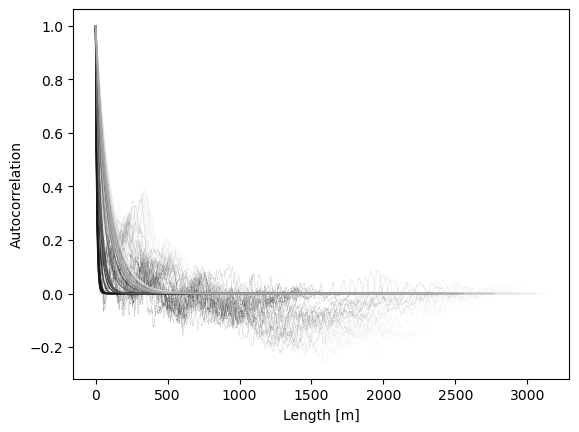

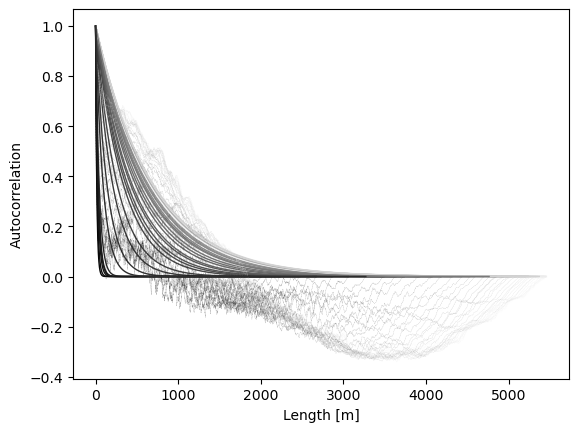

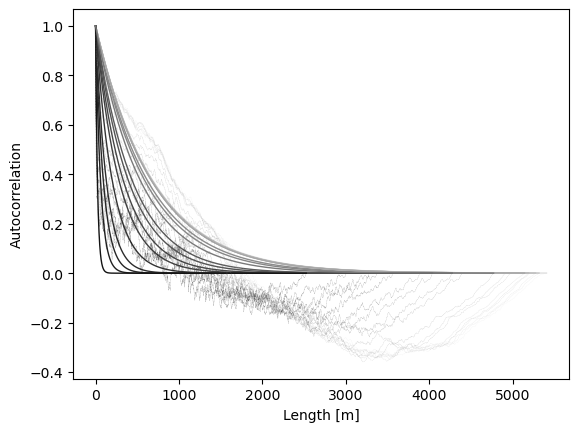

In [32]:
for k, v in qty_dict.items(): v.calc_scales()
quantities.plot_length_scales(qty_dict)

## Plot Reynolds stresses

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: title={'center': 'uu'}, ylabel='y [m]'>,
         <Axes: title={'center': 'vv'}>, <Axes: title={'center': 'ww'}>],
        [<Axes: title={'center': 'uv'}, ylabel='y [m]'>,
         <Axes: title={'center': 'uw'}, xlabel='Reynolds Stress [m^2/s^2]'>,
         <Axes: title={'center': 'vw'}>]], dtype=object))

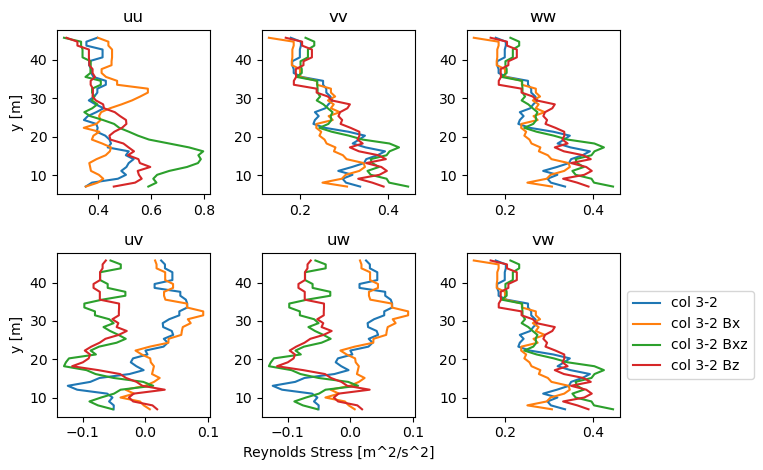

In [ ]:
quantities.plot_reynolds_stresses(qty_dict)

## Plot Turbulence Intensities

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: xlabel='Iu', ylabel='y [m]'>, <Axes: xlabel='Iv'>,
        <Axes: xlabel='Iw'>], dtype=object))

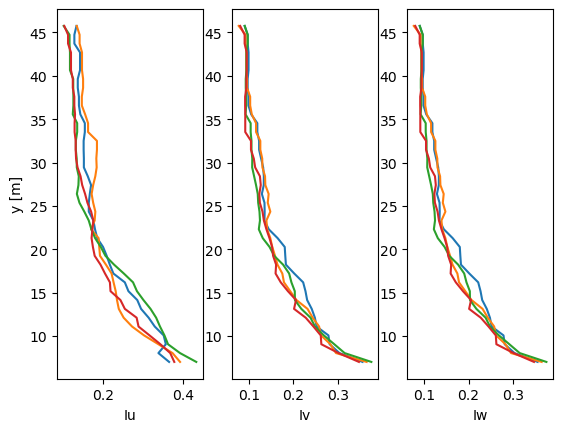

In [ ]:
quantities.plot_turbulence_intensities(qty_dict)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Prms [Pa]', ylabel='y [m]'>)

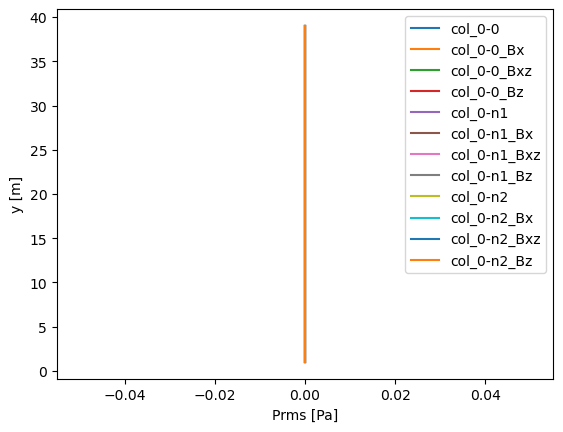

In [ ]:
quantities.plot_prms(qty_dict)

## Spectra

processing data took 2 seconds
pressure data not founnd, replacing with zeros
processing data took 1 seconds
pressure data not founnd, replacing with zeros


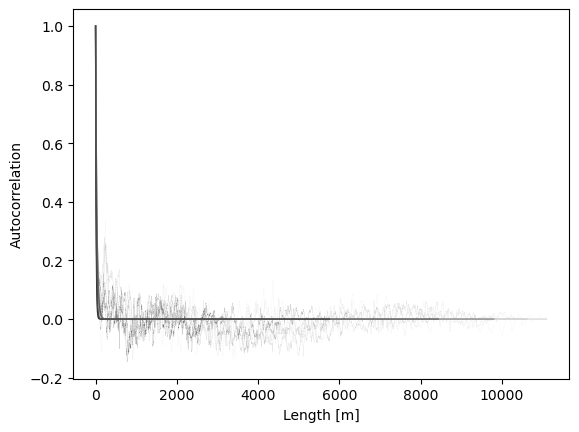

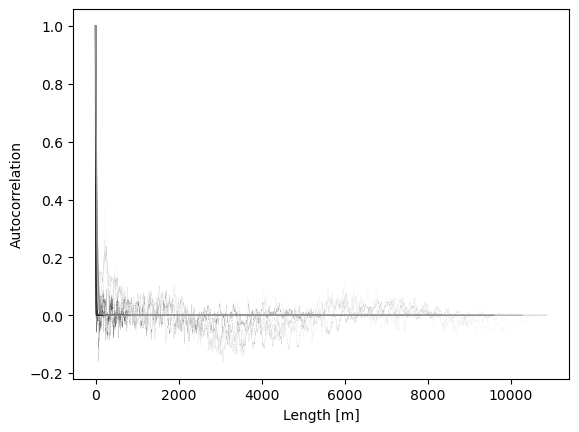

In [9]:
stack = [1, 10, 20, 30, 40, 50]

qty_dict = probes.create_qty_dict(
    theta_wind = theta,
    names = [name for name in  probes.probe_names if "col" in name][0:2],#[name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    stack = stack,
)

for k, v in qty_dict.items(): v.calc_spectra()

/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/pyCascade/quantities.py:299: RuntimeWarning: divide by zero encountered in power
  ax.loglog(qty.f, initial_offset*qty.f**(eval(scaling)), label = scaling)


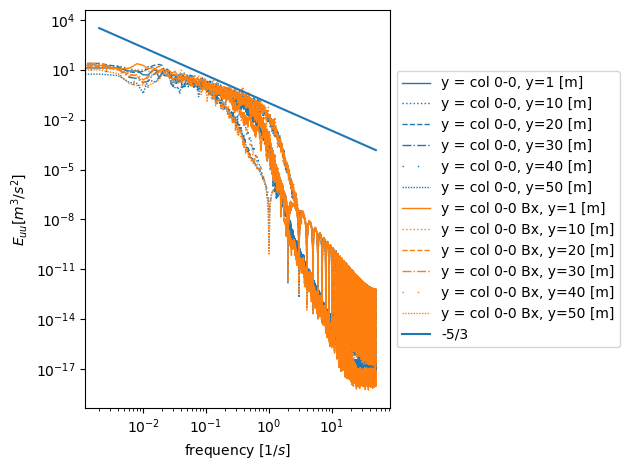

In [10]:
fig, ax = quantities.plot_power_spectra(qty_dict, var = 'Euu')

/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/pyCascade/quantities.py:299: RuntimeWarning: divide by zero encountered in reciprocal
  ax.loglog(qty.f, initial_offset*qty.f**(eval(scaling)), label = scaling)


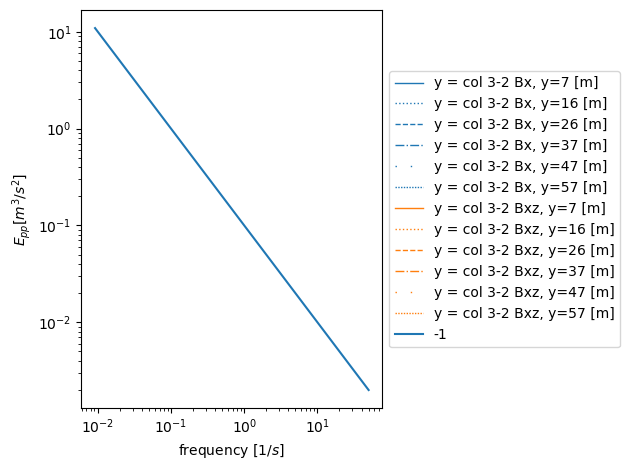

In [ ]:
fig, ax = quantities.plot_power_spectra(qty_dict, var = "Epp", scaling = "-1")